In [1]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dropout, Dense,Reshape
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir="Downloads/Bean_Dataset"
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="training",
    seed=42,
    validation_split=0.2,
    batch_size=32,
    image_size=(224,224))
test_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="validation",
    seed=42,
    validation_split=0.2,
    batch_size=32,
    image_size=(224,224))

Found 990 files belonging to 3 classes.
Using 792 files for training.
Found 990 files belonging to 3 classes.
Using 198 files for validation.


In [3]:
x_test=np.concatenate([x for x,y in test_ds])
x_train=np.concatenate([x for x,y in train_ds])
y_train=np.concatenate([y for x,y in train_ds])
y_test=np.concatenate([y for x,y in test_ds])

In [8]:
from tensorflow.keras.models import Sequential
model = Sequential([
    Reshape((224,224*3),input_shape=(224,224,3)),
    LSTM(128,return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(3,activation='relu')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 224, 672)          0         
                                                                 
 lstm_2 (LSTM)               (None, 224, 128)          410112    
                                                                 
 dropout_1 (Dropout)         (None, 224, 128)          0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                

In [94]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test))

Epoch 1/2
25/25 [==============================] - 33s 1s/step - loss: 1.5789 - val_loss: 1.0986
Epoch 2/2
25/25 [==============================] - 25s 1s/step - loss: 1.0986 - val_loss: 1.0986


1/1 [==============================] - 0s 51ms/step


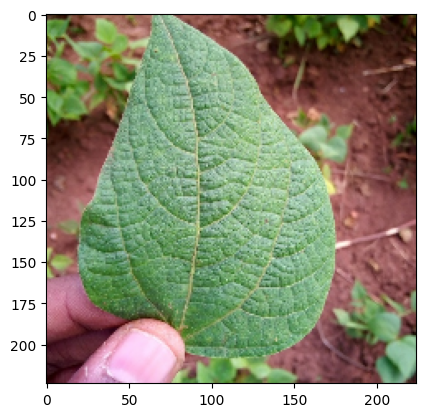

0


In [98]:
def predict_img(image):
    image=np.reshape(image, (1,224,224,3))
    prediction=model.predict(image)
    pred_val=np.argmax(prediction)
    return pred_val

image=x_test[100]
pred_val=predict_img(image)
plt.imshow(x_test[100].astype('uint8'))
plt.show()
print(pred_val)